# Tutorial on Time Series Analysis with Pandas

https://www.dataquest.io/blog/tutorial-time-series-analysis-pandas/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

%matplotlib inline

# Time series data Structure

how to handle time series / time stamps

In [2]:
pd.to_datetime('2018-01-11 3:45pm')

Timestamp('2018-01-11 15:45:00')

In [3]:
pd.to_datetime('2018-01-11 3:45pm', dayfirst=True)

Timestamp('2018-11-01 15:45:00')

### order of day and month (can be detected, if possible)

In [4]:
pd.to_datetime('25/09/1978'), pd.to_datetime('08/09/1978'), pd.to_datetime('09/08/1978')

(Timestamp('1978-09-25 00:00:00'),
 Timestamp('1978-08-09 00:00:00'),
 Timestamp('1978-09-08 00:00:00'))

### time series as a list

In [5]:
pd.to_datetime(['2018-01-11 3:45pm', '09/25/78'])

DatetimeIndex(['2018-01-11 15:45:00', '1978-09-25 00:00:00'], dtype='datetime64[ns]', freq=None)

### to speed up the performance give th used format

In [6]:
pd.to_datetime(['06/09/95', '07/23/04'], format='%m/%d/%y')

DatetimeIndex(['1995-06-09', '2004-07-23'], dtype='datetime64[ns]', freq=None)

# Tutorial on time series analysis

## Data preprocessing

In [7]:
opsd_daily = pd.read_csv('data_opsd_germany_daily.csv')

In [8]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [10]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

### convert Date type - text to DateTime

In [11]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

## Set column Date as DataFrame's index

In [12]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [13]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

### load the file with index column 0 as DateTime

In [14]:
opsd_daily = pd.read_csv('data_opsd_germany_daily.csv',
                         index_col = 0,
                         parse_dates = True)

## add Date columns Year, Month, Weekday Name and fill with content

In [15]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


# Time based indexing

Select time based datas with time formatted strings

'loc' accessor to get access to single data sets or slices

In [16]:
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [17]:
opsd_daily.loc['2014/01/20':'2014/01/22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


### select time slices with partitial time matches (only years, month)

In [18]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


# Visualizing time series data

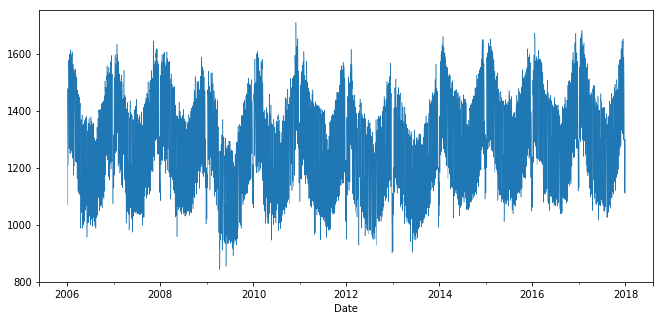

In [19]:
opsd_daily['Consumption'].plot(linewidth = 0.5, figsize = (11,5))

### divide the signals

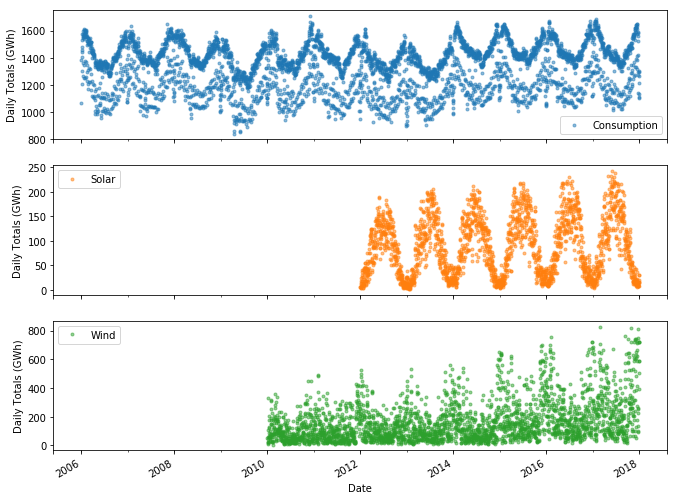

In [20]:
col_plot = ['Consumption', 'Solar', 'Wind']
axis = opsd_daily[col_plot].plot(marker = '.', alpha = 0.5, linestyle = 'None', figsize = (11,9), subplots = True)
for ax in axis:
    ax.set_ylabel('Daily Totals (GWh)')

### go deeper in the time series into a single year

Text(0, 0.5, 'Daily Consumption (GWh)')

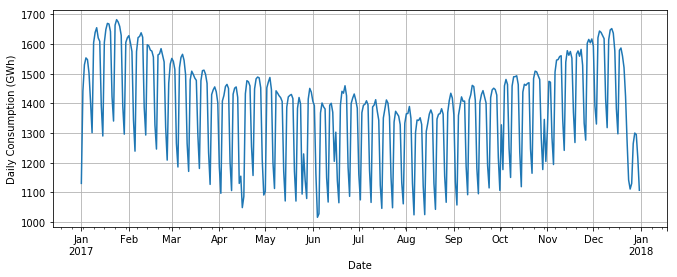

In [21]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize = (11,4), grid = True)
ax.set_ylabel('Daily Consumption (GWh)')

### next insight
weekly dependencies, sesonal trend, drastic decrease in late December and early January (holidays)

Text(0, 0.5, 'Daily Consumption (GWh)')

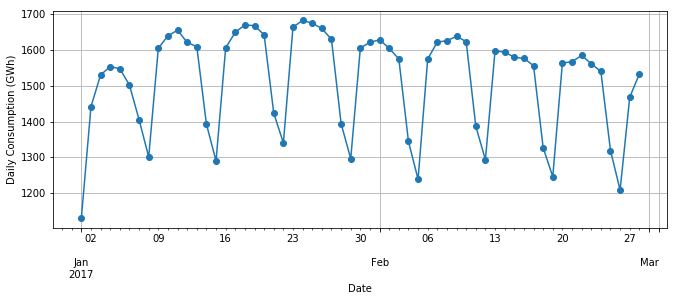

In [22]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker = 'o', figsize = (11,4), grid = True)
ax.set_ylabel('Daily Consumption (GWh)')

### customize the plot

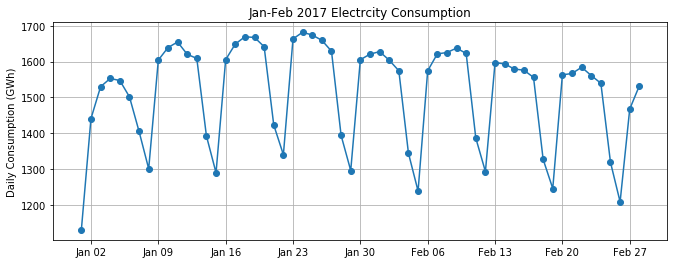

In [23]:
fig, ax = plt.subplots(figsize=(11,4), )
ax.grid(True)
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electrcity Consumption')

#Set x-axis major ticks to weekly interval, on Monday
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

#Format x-tick labels as 3-letter month name and day numver
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Seasonality

Seasonality, shown with box plots 

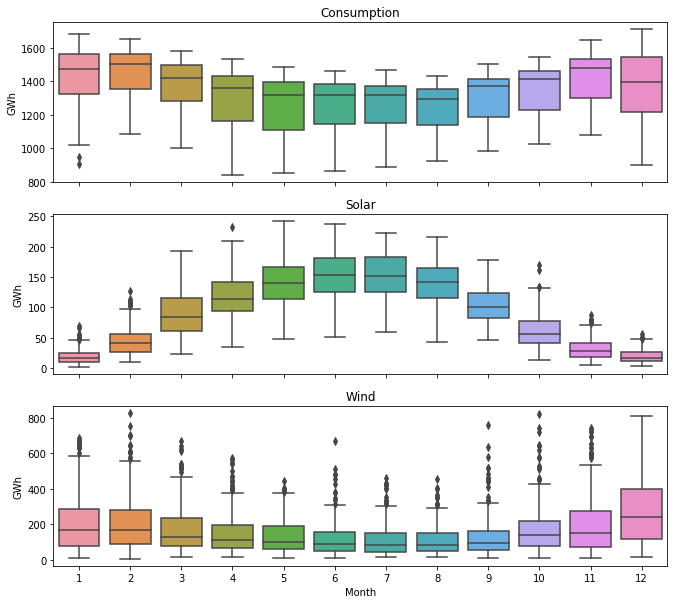

In [24]:
fig, axes = plt.subplots(3,1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    
    #Remove the automatic x-axis label from all but the bottom subplot
    if ax!=axes[-1]:
        ax.set_xlabel('')

### next insight

group by day of the week to explore weekly seasonality

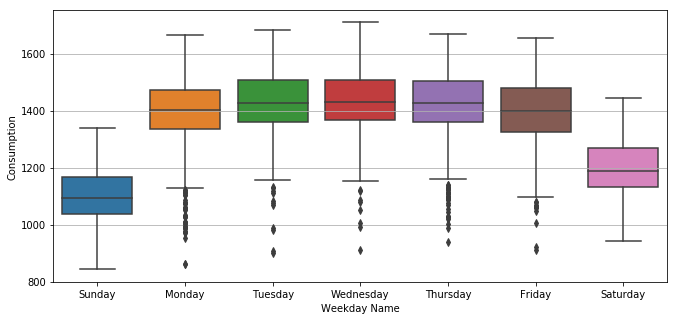

In [25]:
plt.figure(figsize=(11,5))
plt.grid(True)
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption')

# Fequencies

if there is a uniform time spacing

In [26]:
#generate a uniform spaced time set (D aily, M onthly, H ourly, Q uaterly,...)
pd.date_range('1998-03-10','1998-03-15',freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [27]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [28]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

frequence is None

gernerate a frequence, add rows, if there are some missing --> values are NaN, or filled with a specific method

To select an arbitrary sequence of date/time values from a pandas time series, we need to use a DatetimeIndex, rather than simply a list of date/time strings

In [29]:
time_sample = pd.to_datetime(['2013-02-03','2013-02-06','2013-02-08'])

#Select the specific dates and just the COnsumption column
consum_sample = opsd_daily.loc[time_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


### convert to a daily frequence
without filling and forward filling - **asfreq()** for uniform spaced data

In [30]:
#Convert the date to daily frequence, without filling any missings
consum_freq = consum_sample.asfreq('D')

#Create a Column with missings forward filled
consum_freq['Consumtion - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumtion - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


# Resampling
change to a higher (upsampling) or lower (downsampling) frequency
- downsampling usually involves aggregation (e.g. daily to monthly)
- interpolation, other filling operations

pd.resample() with aggregation function mean(), median(), sum()

In [31]:
#Specify th data columns we want to include (i.e. excluding Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

#resample to weekly frequency, aggregting with mean
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [32]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


### display daily and weekly datas
will be smoother, caused by the average/mean value

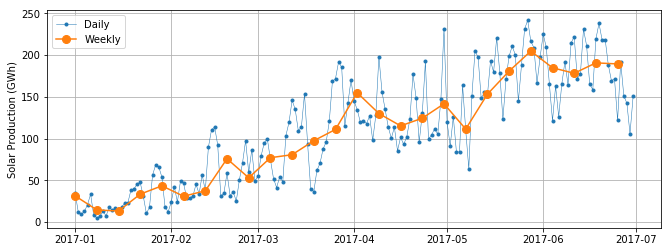

In [33]:
# start and end of the date range to extract
start, end = '2017-01', '2017-06'

# plot daily and weely resampled time series together
fig, ax = plt.subplots(figsize=(11,4))

ax.plot(opsd_daily.loc[start:end, 'Solar'],
       marker='.', linestyle='-', linewidth=0.5,
       label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
       marker='o', markersize=8, linestyle='-',
       label='Weekly')

ax.set_ylabel('Solar Production (GWh)')
ax.grid()
ax.legend()

### display a monthly aggregation
aggregation function is sum()
- **sum()** itself sets the output of NaN to 0
- parameter **min_count** change it to NaN

In [34]:
# compute the monthly sum, setting the value to NaN for each
# month with fewer than 28 days of data

opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN
2006-04-30,38251.767,NaN,NaN,NaN
2006-05-31,38858.143,NaN,NaN,NaN


### Caution:
- weekly resampling is set to the left bin (Monday)
- monthly resampling is set to the right bin (end of month)

Text(0, 0.5, 'Monthly Total (GWh)')

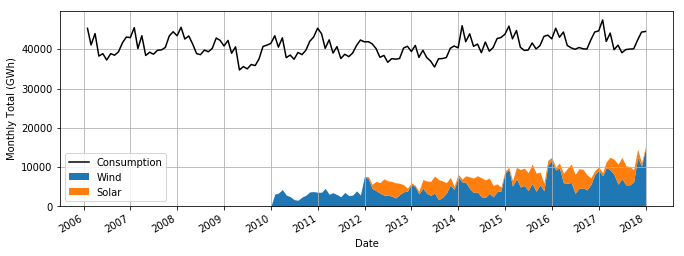

In [35]:
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind','Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.grid()
ax.set_ylabel('Monthly Total (GWh)')

### displaying the annual frequency

In [36]:
# compte the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)

# the default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make liefe easier, set the index to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# compte the ratio of wind + solar to consution
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(6)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

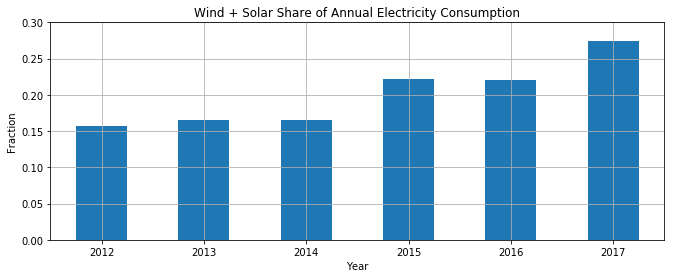

In [37]:
# plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:,'Wind+Solar/Consumption'].plot.bar(color='C0', figsize=(11,4))
ax.set_ylabel('Fraction')
ax.set_ylim(0,0.3)
ax.grid(True)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0)